# 一、项目背景

本数据报告以淘宝app平台为数据集，通过行业的指标对淘宝用户行为进行分析，从而探索淘宝用户的行为模式，具体指标包括：
日PV和日UV分析，付费率分析，复购行为分析，漏斗流失分析和用户价值RFM分析。


# 二、数据来源
https://tianchi.aliyun.com/dataset/dataDetail?dataId=46&userId=1

# 三、提出问题

1.日PV有多少

2.日UV有多少

3.付费率情况如何

4.复购率是多少

5漏斗流失情况如何

6.用户价值情况

# 四、理解数据

本数据集共有104万条左右数据，数据为淘宝APP2014年11月18日至2014年12月18日的用户行为数据，共计6列字段，列字段分别是：

user_id：用户身份，脱敏

item_id：商品ID，脱敏

behavior_type：用户行为类型（包含点击、收藏、加购物车、支付四种行为，分别用数字1、2、3、4表示）

user_geohash：地理位置

item_category：品类ID（商品所属的品类）

time：用户行为发生的时间

# 五、数据清洗

In [1]:
import numpy as ny
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
data_user = pd.read_csv('tianchi_mobile_recommend_train_user.csv')
data_user.head(10)

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21
5,93784494,337869048,1,NaN,3979,2014-12-03 20
6,94832743,105749725,1,NaN,9559,2014-12-13 20
7,95290487,76866650,1,NaN,10875,2014-11-27 16
8,96610296,161166643,1,NaN,3064,2014-12-11 23
9,100684618,21751142,3,NaN,2158,2014-12-05 23


In [2]:
# 1)缺失值处理
missingTotal = data_user.isnull().sum()
missingExist = missingTotal[missingTotal>0]
missingExist = missingExist.sort_values(ascending=False)
missingExist

user_geohash    8334824
dtype: int64

In [3]:
# 2）一致化处理
#拆分数据集
data_user['date']=data_user['time'].map(lambda s:re.compile(' ').split(s)[0])
data_user['hour']=data_user['time'].map(lambda s:re.compile(' ').split(s)[1])
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,98047837,232431562,1,NaN,4245,2014-12-06 02,2014-12-06,02
1,97726136,383583590,1,NaN,5894,2014-12-09 20,2014-12-09,20
2,98607707,64749712,1,NaN,2883,2014-12-18 11,2014-12-18,11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10,2014-12-06,10
4,98145908,290208520,1,NaN,13926,2014-12-16 21,2014-12-16,21


In [4]:
#查看data_user数据集数据类型：
data_user.dtypes

user_id           int64
item_id           int64
behavior_type     int64
user_geohash     object
item_category     int64
time             object
date             object
hour             object
dtype: object

In [5]:
#发现time列和date列应该转化为日期类数据类型，hour列应该是字符串数据类型。

#数据类型转化

data_user['date']=pd.to_datetime(data_user['date'])
data_user['time']=pd.to_datetime(data_user['time'])
data_user['hour']=data_user['hour'].astype('int64')
data_user.dtypes # 核对是否转换成功

user_id                   int64
item_id                   int64
behavior_type             int64
user_geohash             object
item_category             int64
time             datetime64[ns]
date             datetime64[ns]
hour                      int64
dtype: object

In [6]:
# 3）异常值处理
data_user=data_user.sort_values(by='time',ascending=True)#排序处理
data_user=data_user.reset_index(drop=True)#建立索引
data_user.describe()

,user_id,item_id,behavior_type,item_category,hour
count,1.225691e+07,1.225691e+07,1.225691e+07,1.225691e+07,1.225691e+07
mean,7.170732e+07,2.023084e+08,1.105271e+00,6.846162e+03,1.481799e+01
std,4.122920e+07,1.167397e+08,4.572662e-01,3.809922e+03,6.474778e+00
min,4.913000e+03,6.400000e+01,1.000000e+00,2.000000e+00,0.000000e+00
25%,3.584965e+07,1.014130e+08,1.000000e+00,3.721000e+03,1.000000e+01
50%,7.292804e+07,2.021359e+08,1.000000e+00,6.209000e+03,1.600000e+01
75%,1.073774e+08,3.035405e+08,1.000000e+00,1.029000e+04,2.000000e+01
max,1.424559e+08,4.045625e+08,4.000000e+00,1.408000e+04,2.300000e+01


# 六、用户行为分析

        date      pv
0 2014-11-18  366701
1 2014-11-19  358823
2 2014-11-20  353429
3 2014-11-21  333104
4 2014-11-22  361355
        date    uv
0 2014-11-18  6343
1 2014-11-19  6420
2 2014-11-20  6333
3 2014-11-21  6276
4 2014-11-22  6187


Text(0.5, 1.0, 'pv_daily')

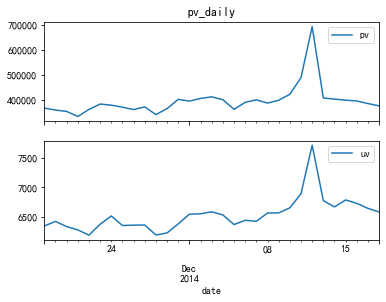

In [7]:
# 1）日访问量分析
#pv_daily记录每天用户操作次数，uv_daily记录每天不同的上线用户数量
pv_daily=data_user.groupby('date')['user_id'].count().reset_index().rename(columns={'user_id':'pv'})
uv_daily=data_user.groupby('date')['user_id'].apply(lambda x:x.drop_duplicates().count()).reset_index().rename(columns={'user_id':'uv'})
print(pv_daily.head())
print(uv_daily.head())

fig,axes=plt.subplots(2,1,sharex=True)
pv_daily.plot(x='date',y='pv',ax=axes[0])
uv_daily.plot(x='date',y='uv',ax=axes[1])
axes[0].set_title('pv_daily')

In [8]:
print(pv_daily.sort_values(by = 'pv',ascending=False).head(5))
print(uv_daily.sort_values(by = 'uv',ascending=False).head(5))


         date      pv
24 2014-12-12  691712
23 2014-12-11  488508
22 2014-12-10  421910
15 2014-12-03  411606
25 2014-12-13  407160
         date    uv
24 2014-12-12  7720
23 2014-12-11  6894
27 2014-12-15  6787
25 2014-12-13  6776
28 2014-12-16  6729


Text(0.5, 1.0, 'uv_hour')

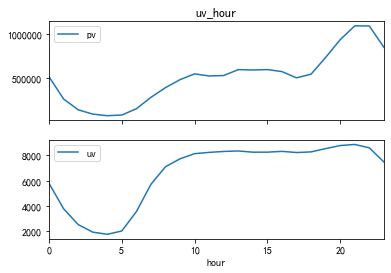

In [9]:
# 2）小时访问量分析
#pv_hour记录每小时用户操作次数，uv_hour记录每小时不同的上线用户数量
pv_hour=data_user.groupby('hour')['user_id'].count().reset_index().rename(columns={'user_id':'pv'})
uv_hour=data_user.groupby('hour')['user_id'].apply(lambda x:x.drop_duplicates().count()).reset_index().rename(columns={'user_id':'uv'})
fig,axes=plt.subplots(2,1,sharex=True)
pv_hour.plot(x='hour',y='pv',ax=axes[0])
uv_hour.plot(x='hour',y='uv',ax=axes[1])
axes[0].set_title('pv_hour')
axes[0].set_title('uv_hour')

Text(0.5, 1.0, 'pv_different_behavior_type_except1')

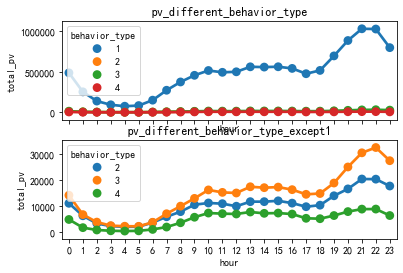

In [10]:
#3) 不同行为类型用户pv分析
pv_detail=data_user.groupby(['behavior_type','hour'])['user_id'].count().reset_index().rename(columns={'user_id':'total_pv'})
fig,axes=plt.subplots(2,1,sharex=True)
sns.pointplot(x='hour',y='total_pv',hue='behavior_type',data=pv_detail,ax=axes[0])
sns.pointplot(x='hour',y='total_pv',hue='behavior_type',data=pv_detail[pv_detail.behavior_type!=1],ax=axes[1])
axes[0].set_title('pv_different_behavior_type')
axes[1].set_title('pv_different_behavior_type_except1')

# 七、用户消费行为分析

Text(0.5, 1.0, 'daily_user_buy')

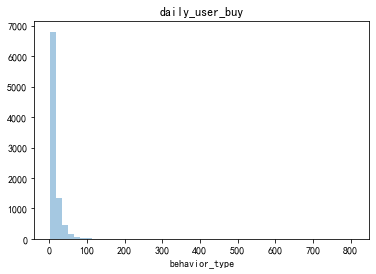

In [11]:
# （1）用户购买次数情况分析
data_user_buy=data_user[data_user.behavior_type==4].groupby('user_id')['behavior_type'].count()
sns.distplot(data_user_buy,kde=False)
plt.title('daily_user_buy')

In [12]:
# （2）日ARPPU

Text(0.5, 1.0, 'daily_ARPPU')

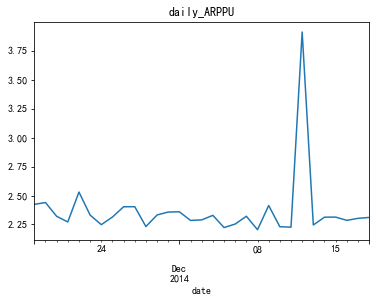

In [13]:
data_use_buy1=data_user[data_user.behavior_type==4].groupby(['date','user_id'])['behavior_type'].count().reset_index().rename(columns={'behavior_type':'total'})
data_use_buy1.groupby('date').apply(lambda x:x.total.sum()/x.total.count()).plot()
plt.title('daily_ARPPU')

In [14]:
# （3）日ARPU

Text(0.5, 1.0, 'daily_ARPU')

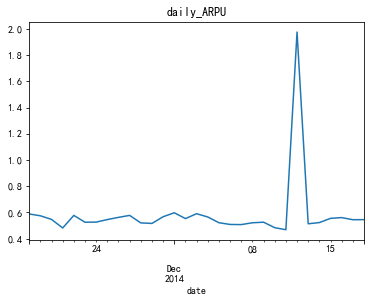

In [15]:
data_user['operation']=1
data_use_buy2=data_user.groupby(['date','user_id','behavior_type'])['operation'].count().reset_index().rename(columns={'operation':'total'})
data_use_buy2.groupby('date').apply(lambda x:x[x.behavior_type==4].total.sum()/len(x.user_id.unique())).plot()
plt.title('daily_ARPU')

In [16]:
# （4）付费率

Text(0.5, 1.0, 'daily_afford_rate')

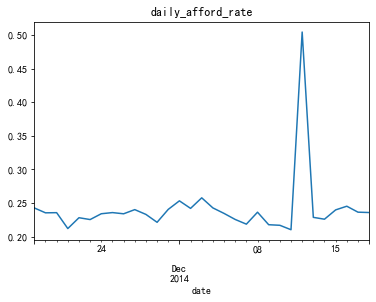

In [17]:
data_use_buy2.groupby('date').apply(lambda x:x[x.behavior_type==4].total.count()/len(x.user_id.unique())).plot()
plt.title('daily_afford_rate')

In [18]:
# （5）同一时间段用户消费次数分布

大多数用户消费：1次


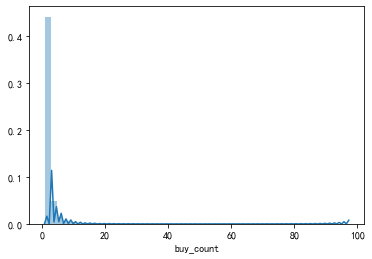

In [19]:
data_user_buy3=data_user[data_user.behavior_type==4].groupby(['user_id','date','hour'])['operation'].sum().rename('buy_count')
sns.distplot(data_user_buy3)
print('大多数用户消费：{}次'.format(data_user_buy3.mode()[0]))
#输出结果
# 在同一时间段中，大多数用户消费次数为1次

# 八、复购情况分析

In [20]:
date_rebuy=data_user[data_user.behavior_type==4].groupby('user_id')['date'].apply(lambda x:len(x.unique())).rename('rebuy_count')
print('复购率:',round(date_rebuy[date_rebuy>=2].count()/date_rebuy.count(),4))
#输出结果
# 复购率: 0.8717

复购率: 0.8717


多数用户复购次数：0次


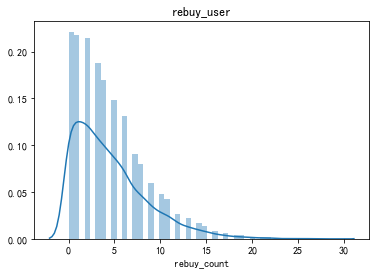

In [21]:
sns.distplot(date_rebuy-1)
plt.title('rebuy_user')
print('多数用户复购次数：{}次'.format((date_rebuy-1).mode()[0]))

In [ ]:
#所有复购时间间隔消费次数分布
sns.set()
data_day_buy=data_user[data_user.behavior_type==4].groupby(['user_id','date']).operation.count().reset_index()
data_user_buy4=data_day_buy.groupby('user_id').date.apply(lambda x:x.sort_values().diff(1).dropna())
data_user_buy4=data_user_buy4.map(lambda x:x.days)
data_user_buy4.value_counts().plot(kind='bar')
plt.title('time_gap')
plt.xlabel('gap_day')
plt.ylabel('gap_count')

In [ ]:
#不同用户平均复购时间分析
sns.distplot(data_user_buy4.reset_index().groupby('user_id').date.mean())

# 九、漏斗流失分析

In [ ]:
data_user_count=data_user.groupby(['behavior_type']).count()
data_user_count.head()
pv_all=data_user['user_id'].count()
print(pv_all)
#输出结果

# 十、用户行为与商品种类关系分析

In [ ]:
#不同用户行为类别的转化率
data_category=data_user[data_user.behavior_type!=2].groupby(['item_category','behavior_type']).operation.count().unstack(1).rename(columns={1:'点击量',3:'加入购物车量',4:'购买量'}).fillna(0)
data_category.head()

In [ ]:
#转化率计算
data_category['转化率']=data_category['购买量']/data_category['点击量']
data_category.head()

In [ ]:
#异常值处理
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
data_category=data_category.fillna(0)
data_category=data_category[data_category['转化率']<=1]
#转化率绘图
sns.distplot(data_category['转化率'])

In [ ]:
data_category['感兴趣比率']=data_category['加入购物车量']/data_category['点击量']
data_category.head()

In [ ]:
#异常值处理，感兴趣比率绘图
data_category=data_category[data_category['感兴趣比率']<=1]
sns.distplot(data_category['感兴趣比率'])

In [ ]:
sns.distplot(data_category[data_category['感兴趣比率']>0]['感兴趣比率'],kde=False)

In [ ]:
##将转化率分三类查看各类占比例
data_convert_rate=pd.cut(data_category['转化率'],[-1,0,0.1,1]).value_counts()
data_convert_rate=data_convert_rate/data_convert_rate.sum()
data_convert_rate
#输出结果

In [ ]:
##将感兴趣比率分三类查看各类占比例
data_interest_rate=pd.cut(data_category['感兴趣比率'],[-1,0,0.1,1]).value_counts()
data_interest_rate=data_interest_rate/data_interest_rate.sum()
data_interest_rate
#输出结果

# 十一、二八理论分析

In [ ]:
#二八理论和长尾理论
data_category=data_category[data_category['购买量']>0]
value_8=data_category['购买量'].sum()*0.8
value_10=data_category['购买量'].sum()
data_category=data_category.sort_values(by='购买量',ascending=False)
data_category['累计购买量']=data_category['购买量'].cumsum()
data_category['分类']=data_category['累计购买量'].map(lambda x:'前80%' if x<=value_8 else '后20%')
data_category.head()

In [ ]:
data_category.groupby('分类')['分类'].count()/data_category['分类'].count()
#输出结果

# 十二、用户价值度RFM模型分析

In [ ]:
from datetime import datetime
datenow=datetime(2014,12,20)
#每位用户最近购买时间
recent_buy_time=data_user[data_user.behavior_type==4].groupby('user_id').date.apply(lambda x:datetime(2014,12,20)-x.sort_values().iloc[-1]).reset_index().rename(columns={'date':'recent'})
recent_buy_time.recent=recent_buy_time.recent.map(lambda x:x.days)
#每个用户消费频率
buy_freq=data_user[data_user.behavior_type==4].groupby('user_id').date.count().reset_index().rename(columns={'date':'freq'})
rfm=pd.merge(recent_buy_time,buy_freq,left_on='user_id',right_on='user_id',how='outer')
#将各维度分成两个程度,分数越高越好
rfm['recent_value']=pd.qcut(rfm.recent,2,labels=['2','1'])
rfm['freq_value']=pd.qcut(rfm.freq,2,labels=['1','2'])
rfm['rfm']=rfm['recent_value'].str.cat(rfm['freq_value'])
rfm.head()